In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from IPython.display import display


In [2]:
df1 = pd.read_csv("dataofchicago.csv")
df2 = pd.read_csv("Chicago Health Atlas Data Download - Community areas.csv")
df3 = pd.read_csv("Grocery Store Chains.csv")

In [3]:
df1

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,BOB'S LIQUORS & GROCERIES,957.0,86492.0,10001.0,A,5069 W MADISON ST,60644.0,AUSTIN,25.0,28.0,1.703125e+10,1.703130e+14,1142425.327,1899505.114,41.880296,-87.752494,"(41.8802960895, -87.7524941982)"
1,QUICK STOP FOOD MART,39791.0,3604.0,3000.0,B,2751 W PRATT BLVD,60645.0,WEST RIDGE,2.0,50.0,1.703102e+10,1.703100e+14,1156542.527,1944958.748,42.004750,-87.699423,"(42.0047500731, -87.6994227766)"
2,DOMINICK'S #147/1147,41674.0,5033.0,68000.0,A,1340 S CANAL ST,60607.0,NEAR WEST SIDE,28.0,2.0,1.703184e+10,1.703180e+14,1173296.123,1893985.705,41.864521,-87.639304,"(41.8645211937, -87.6393040996)"
3,CERMAK PRODUCE,1515206.0,279468.0,25000.0,A,5220 S PULASKI RD,60632.0,WEST ELSDON,62.0,23.0,1.703162e+10,1.703160e+14,1150549.398,1869568.674,41.797992,-87.723444,"(41.79799187, -87.7234437408)"
4,WHOLE FOODS MARKET,54059.0,86298.0,4501.0,B,3300 N ASHLAND AVE,60657.0,LAKE VIEW,6.0,44.0,1.703106e+10,1.703110e+14,1165027.797,1921997.107,41.941566,-87.668860,"(41.9415658578, -87.6688604029)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,CERMAK PRODUCE,1770942.0,311980.0,17000.0,A,3311 W 26TH ST,60623.0,SOUTH LAWNDALE,30.0,22.0,1.703184e+10,1.703180e+14,1154665.272,1886497.894,41.844367,-87.707898,"(41.8443667287, -87.7078980538)"
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2

,Layer,Name,GEOID,Population,HCSNVP_2022-2023,EKW_2022,HCSRIP_2022-2023,HCSWTSP_2022-2023,HTJ_2018-2022,LFA_2019,HCSNSP_2022-2023,HCSTLEP_2022-2023,EDA_2018-2022,EDB_2018-2022,PCI_2018-2022,LEQ_2018-2022,PCT-W_2018-2022,SLA-S_2018-2022
0,NaN,NaN,NaN,NaN,Perceived neighborhood violence rate (% of adu...,"Walkability Index, 2022","Reliable internet access rate (% of adults), 2...",Ease of walking to transit stop rate (% of adu...,"Crowded housing (% of occupied housing units),...","Low food access (% of residents), 2019",Perceived neighborhood safety rate (% of adult...,"Trust in law enforcement rate (% of adults), 2...","9th grade education rate (% of residents), 201...","High school graduation rate (% of residents), ...","Per capita income, 2018-2022","Limited English proficiency (% of residents), ...","Demographics, Non-Hispanic White (% of residen...","Seniors living alone, 65 and older (% of senio..."
1,Community area,Rogers Park,1.0,55454.0,42.703466616,14.400509820782586,92.294412445,77.210075257,6.37936303325669,5.678961566556456,60.700015596,43.640613186,93.8715242944428,88.93645419063826,33418.25433831019,5.952283483108136,46.08520231045615,44.83001339440949
2,Community area,Norwood Park,10.0,41069.0,20.92029631,14.616748612283676,91.592146359,70.949497868,1.4283437553037381,57.98229505067905,77.766412855,77.388891163,96.10523962175319,93.06068315619031,46079.994542629356,2.478622926381088,70.98522553216816,29.29226778504404
3,Community area,Jefferson Park,11.0,26201.0,16.374937061,16.115697644854208,91.524413989,76.110604746,2.4503841465745735,9.38820742416371,79.263826467,60.079924773,95.82587951831005,92.05433201665662,38515.33897951377,8.791901656503352,57.00598824316118,33.57904740090945
4,Community area,Forest Glen,12.0,19579.0,4.7230256155,15.378207182353865,97.966558256,80.410893937,0.7762947853224645,17.519884553382333,94.582335434,88.719634075,97.67659705593752,95.54409595515267,64922.01608840278,3.243097852430377,73.90889856561219,27.27463076359936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Community area,Morgan Park,75.0,21714.0,25.231252337,14.098944482290312,94.928749337,67.765166183,1.1457799715896064,32.350855661418606,76.539645394,60.530931572,98.11749898507817,93.23158023395966,36008.77499951802,0.2966176622242773,30.654279061296346,32.49405359100892
74,Community area,O'Hare,76.0,14416.0,3.4809697899,12.989308171544458,86.057960414,71.987711587,4.032130112098913,75.77128405493244,85.645702634,63.590412467,96.49498099426928,91.21070013817753,37106.87965803452,13.897632448288496,61.10138029986174,31.327906700798
75,Community area,Edgewater,77.0,56308.0,16.351903659,13.866368447807279,97.841597637,90.686080494,3.225074269254027,0.0015165122300944726,81.42082757,55.880787611,96.88716013078876,93.05512230831835,47497.03794166345,5.403290205484148,53.647507835164596,49.18721947887339
76,Community area,Near North Side,8.0,97789.0,35.607553635,16.047329150194823,98.615401442,91.13994319,2.108849451309047,0.0034727666189065766,74.399614369,64.397746107,99.49417635910153,98.34598937489106,109319.12067575338,0.6383814827748808,68.6112538436234,44.628028310631215


In [5]:
df3

,COMPANY,STORE TYPE,ADDRESS,CITY,ZIP CODE,STATE,LOCATION
0,Trader Joe's,Specialty,190 N. Northwest Highway,Park Ridge,60068,IL,"190 N. Northwest Highway\nPark Ridge, IL\n(42...."
1,Target,Supercenter,4120 W 95th St,Oak Lawn,60453,IL,"4120 W 95th St\nOak Lawn, IL\n(41.720432834000..."
2,Jewel-Osco,FullService,4650 W 103Rd St,Oak Lawn,60453,IL,"4650 W 103Rd St\nOak Lawn, IL\n(41.70565875600..."
3,Jewel-Osco,FullService,438 W. Madison St,Oak Park,60302,IL,"438 W. Madison St\nOak Park, IL\n(41.879911871..."
4,Target,Supercenter,6150 W Touhy Ave,Niles,60714,IL,"6150 W Touhy Ave\nNiles, IL\n(42.0120000790004..."
5,Target,Supercenter,4050 N Harlem Ave,Norridge,60706,IL,"4050 N Harlem Ave\nNorridge, IL\n(41.953931184..."
6,Aldi,Discount,7020 S. Cicero Ave.,Bedford Park,60638,IL,"7020 S. Cicero Ave.\nBedford Park, IL\n(41.764..."
7,Dominick's,FullService,8700 S Cicero Ave,Oak Lawn,60453,IL,"8700 S Cicero Ave\nOak Lawn, IL\n(41.734104305..."
8,Aldi,Discount,4703 N Harlem,Harwood Heights,60706,IL,"4703 N Harlem\nHarwood Heights, IL\n(41.965617..."
9,Costco,Wholesale,7300 S. Cicero Ave,Bedford Park,60629,IL,"7300 S. Cicero Ave\nBedford Park, IL\n(41.7600..."


In [6]:
df = df2.drop([0])
df = df.reset_index(drop=True)
df

,Layer,Name,GEOID,Population,HCSNVP_2022-2023,EKW_2022,HCSRIP_2022-2023,HCSWTSP_2022-2023,HTJ_2018-2022,LFA_2019,HCSNSP_2022-2023,HCSTLEP_2022-2023,EDA_2018-2022,EDB_2018-2022,PCI_2018-2022,LEQ_2018-2022,PCT-W_2018-2022,SLA-S_2018-2022
0,Community area,Rogers Park,1.0,55454.0,42.703466616,14.400509820782586,92.294412445,77.210075257,6.37936303325669,5.678961566556456,60.700015596,43.640613186,93.8715242944428,88.93645419063826,33418.25433831019,5.952283483108136,46.08520231045615,44.83001339440949
1,Community area,Norwood Park,10.0,41069.0,20.92029631,14.616748612283676,91.592146359,70.949497868,1.4283437553037381,57.98229505067905,77.766412855,77.388891163,96.10523962175319,93.06068315619031,46079.994542629356,2.478622926381088,70.98522553216816,29.29226778504404
2,Community area,Jefferson Park,11.0,26201.0,16.374937061,16.115697644854208,91.524413989,76.110604746,2.4503841465745735,9.38820742416371,79.263826467,60.079924773,95.82587951831005,92.05433201665662,38515.33897951377,8.791901656503352,57.00598824316118,33.57904740090945
3,Community area,Forest Glen,12.0,19579.0,4.7230256155,15.378207182353865,97.966558256,80.410893937,0.7762947853224645,17.519884553382333,94.582335434,88.719634075,97.67659705593752,95.54409595515267,64922.01608840278,3.243097852430377,73.90889856561219,27.27463076359936
4,Community area,North Park,13.0,17522.0,7.810401898,15.084817934706479,91.60362394,80.559433688,5.454178207719583,76.7781154091305,87.16669581,58.481791305,93.48904789361576,88.61180897214412,34174.27442014163,9.104765896851552,45.39293802626685,29.223525736839917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Community area,Morgan Park,75.0,21714.0,25.231252337,14.098944482290312,94.928749337,67.765166183,1.1457799715896064,32.350855661418606,76.539645394,60.530931572,98.11749898507817,93.23158023395966,36008.77499951802,0.2966176622242773,30.654279061296346,32.49405359100892
73,Community area,O'Hare,76.0,14416.0,3.4809697899,12.989308171544458,86.057960414,71.987711587,4.032130112098913,75.77128405493244,85.645702634,63.590412467,96.49498099426928,91.21070013817753,37106.87965803452,13.897632448288496,61.10138029986174,31.327906700798
74,Community area,Edgewater,77.0,56308.0,16.351903659,13.866368447807279,97.841597637,90.686080494,3.225074269254027,0.0015165122300944726,81.42082757,55.880787611,96.88716013078876,93.05512230831835,47497.03794166345,5.403290205484148,53.647507835164596,49.18721947887339
75,Community area,Near North Side,8.0,97789.0,35.607553635,16.047329150194823,98.615401442,91.13994319,2.108849451309047,0.0034727666189065766,74.399614369,64.397746107,99.49417635910153,98.34598937489106,109319.12067575338,0.6383814827748808,68.6112538436234,44.628028310631215


In [7]:
grocery_chain_list = df3['COMPANY'].unique()  # Get the unique company names


In [8]:
# Function to check if any company name is a substring of the store name
def is_chain(store_name):
    if isinstance(store_name, str):  # Ensure the store_name is a string
        for chain in grocery_chain_list:
            if isinstance(chain, str) and chain.lower() in store_name.lower():
                return 1
    return 0

In [9]:
df1['Grocery Chain'] = df1['STORE NAME'].apply(is_chain)

In [10]:
df1.to_csv('updated_grocery_store_list.csv', index=False)
df1

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Grocery Chain
0,BOB'S LIQUORS & GROCERIES,957.0,86492.0,10001.0,A,5069 W MADISON ST,60644.0,AUSTIN,25.0,28.0,1.703125e+10,1.703130e+14,1142425.327,1899505.114,41.880296,-87.752494,"(41.8802960895, -87.7524941982)",0
1,QUICK STOP FOOD MART,39791.0,3604.0,3000.0,B,2751 W PRATT BLVD,60645.0,WEST RIDGE,2.0,50.0,1.703102e+10,1.703100e+14,1156542.527,1944958.748,42.004750,-87.699423,"(42.0047500731, -87.6994227766)",0
2,DOMINICK'S #147/1147,41674.0,5033.0,68000.0,A,1340 S CANAL ST,60607.0,NEAR WEST SIDE,28.0,2.0,1.703184e+10,1.703180e+14,1173296.123,1893985.705,41.864521,-87.639304,"(41.8645211937, -87.6393040996)",1
3,CERMAK PRODUCE,1515206.0,279468.0,25000.0,A,5220 S PULASKI RD,60632.0,WEST ELSDON,62.0,23.0,1.703162e+10,1.703160e+14,1150549.398,1869568.674,41.797992,-87.723444,"(41.79799187, -87.7234437408)",0
4,WHOLE FOODS MARKET,54059.0,86298.0,4501.0,B,3300 N ASHLAND AVE,60657.0,LAKE VIEW,6.0,44.0,1.703106e+10,1.703110e+14,1165027.797,1921997.107,41.941566,-87.668860,"(41.9415658578, -87.6688604029)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,CERMAK PRODUCE,1770942.0,311980.0,17000.0,A,3311 W 26TH ST,60623.0,SOUTH LAWNDALE,30.0,22.0,1.703184e+10,1.703180e+14,1154665.272,1886497.894,41.844367,-87.707898,"(41.8443667287, -87.7078980538)",0
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
df1['COMMUNITY AREA NAME'] = df1['COMMUNITY AREA NAME'].str.strip().str.lower()
df['Name'] = df['Name'].str.strip().str.lower()

In [12]:
#Store count
store_counts = df1.groupby('COMMUNITY AREA NAME').size().reset_index(name='Store Count')

#merge df 
df = df.merge(store_counts, how='left', left_on='Name', right_on='COMMUNITY AREA NAME')
df.drop(columns=['Layer'], inplace=True)
df['Store Count'] = df['Store Count'].fillna(0)

In [13]:
#Chain count
chain_counts = df1[df1['Grocery Chain'] == 1]
chain_counts = chain_counts.groupby('COMMUNITY AREA NAME').size().reset_index(name='Grocery Chain Count')

df = df.merge(chain_counts, how='left', left_on='Name', right_on='COMMUNITY AREA NAME')
df['Grocery Chain Count'] = df['Grocery Chain Count'].fillna(0)


In [14]:
df.drop(columns=['COMMUNITY AREA NAME_x', 'COMMUNITY AREA NAME_y'], inplace=True)

In [15]:
df

,Name,GEOID,Population,HCSNVP_2022-2023,EKW_2022,HCSRIP_2022-2023,HCSWTSP_2022-2023,HTJ_2018-2022,LFA_2019,HCSNSP_2022-2023,HCSTLEP_2022-2023,EDA_2018-2022,EDB_2018-2022,PCI_2018-2022,LEQ_2018-2022,PCT-W_2018-2022,SLA-S_2018-2022,Store Count,Grocery Chain Count
0,rogers park,1.0,55454.0,42.703466616,14.400509820782586,92.294412445,77.210075257,6.37936303325669,5.678961566556456,60.700015596,43.640613186,93.8715242944428,88.93645419063826,33418.25433831019,5.952283483108136,46.08520231045615,44.83001339440949,13.0,1.0
1,norwood park,10.0,41069.0,20.92029631,14.616748612283676,91.592146359,70.949497868,1.4283437553037381,57.98229505067905,77.766412855,77.388891163,96.10523962175319,93.06068315619031,46079.994542629356,2.478622926381088,70.98522553216816,29.29226778504404,4.0,1.0
2,jefferson park,11.0,26201.0,16.374937061,16.115697644854208,91.524413989,76.110604746,2.4503841465745735,9.38820742416371,79.263826467,60.079924773,95.82587951831005,92.05433201665662,38515.33897951377,8.791901656503352,57.00598824316118,33.57904740090945,3.0,0.0
3,forest glen,12.0,19579.0,4.7230256155,15.378207182353865,97.966558256,80.410893937,0.7762947853224645,17.519884553382333,94.582335434,88.719634075,97.67659705593752,95.54409595515267,64922.01608840278,3.243097852430377,73.90889856561219,27.27463076359936,2.0,0.0
4,north park,13.0,17522.0,7.810401898,15.084817934706479,91.60362394,80.559433688,5.454178207719583,76.7781154091305,87.16669581,58.481791305,93.48904789361576,88.61180897214412,34174.27442014163,9.104765896851552,45.39293802626685,29.223525736839917,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,morgan park,75.0,21714.0,25.231252337,14.098944482290312,94.928749337,67.765166183,1.1457799715896064,32.350855661418606,76.539645394,60.530931572,98.11749898507817,93.23158023395966,36008.77499951802,0.2966176622242773,30.654279061296346,32.49405359100892,7.0,0.0
73,o'hare,76.0,14416.0,3.4809697899,12.989308171544458,86.057960414,71.987711587,4.032130112098913,75.77128405493244,85.645702634,63.590412467,96.49498099426928,91.21070013817753,37106.87965803452,13.897632448288496,61.10138029986174,31.327906700798,0.0,0.0
74,edgewater,77.0,56308.0,16.351903659,13.866368447807279,97.841597637,90.686080494,3.225074269254027,0.0015165122300944726,81.42082757,55.880787611,96.88716013078876,93.05512230831835,47497.03794166345,5.403290205484148,53.647507835164596,49.18721947887339,11.0,2.0
75,near north side,8.0,97789.0,35.607553635,16.047329150194823,98.615401442,91.13994319,2.108849451309047,0.0034727666189065766,74.399614369,64.397746107,99.49417635910153,98.34598937489106,109319.12067575338,0.6383814827748808,68.6112538436234,44.628028310631215,17.0,3.0


In [16]:
print(df.dtypes)


Name                    object
GEOID                  float64
Population             float64
HCSNVP_2022-2023        object
EKW_2022                object
HCSRIP_2022-2023        object
HCSWTSP_2022-2023       object
HTJ_2018-2022           object
LFA_2019                object
HCSNSP_2022-2023        object
HCSTLEP_2022-2023       object
EDA_2018-2022           object
EDB_2018-2022           object
PCI_2018-2022           object
LEQ_2018-2022           object
PCT-W_2018-2022         object
SLA-S_2018-2022         object
Store Count            float64
Grocery Chain Count    float64
dtype: object


In [17]:
columns = df.columns.tolist()
print(columns)

['Name', 'GEOID', 'Population', 'HCSNVP_2022-2023', 'EKW_2022', 'HCSRIP_2022-2023', 'HCSWTSP_2022-2023', 'HTJ_2018-2022', 'LFA_2019', 'HCSNSP_2022-2023', 'HCSTLEP_2022-2023', 'EDA_2018-2022', 'EDB_2018-2022', 'PCI_2018-2022', 'LEQ_2018-2022', 'PCT-W_2018-2022', 'SLA-S_2018-2022', 'Store Count', 'Grocery Chain Count']


In [18]:
categorical_columns = ['HCSNVP_2022-2023', 'EKW_2022', 'HCSRIP_2022-2023', 'HCSWTSP_2022-2023', 'HTJ_2018-2022', 'LFA_2019', 'HCSNSP_2022-2023', 'HCSTLEP_2022-2023', 'EDA_2018-2022', 'EDB_2018-2022', 'PCI_2018-2022', 'LEQ_2018-2022', 'PCT-W_2018-2022', 'SLA-S_2018-2022', 'Store Count', 'Grocery Chain Count']

# Convert columns to numeric, coercing errors to NaN
for col in categorical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the updated DataFrame dtypes
print(df.dtypes)

Name                    object
GEOID                  float64
Population             float64
HCSNVP_2022-2023       float64
EKW_2022               float64
HCSRIP_2022-2023       float64
HCSWTSP_2022-2023      float64
HTJ_2018-2022          float64
LFA_2019               float64
HCSNSP_2022-2023       float64
HCSTLEP_2022-2023      float64
EDA_2018-2022          float64
EDB_2018-2022          float64
PCI_2018-2022          float64
LEQ_2018-2022          float64
PCT-W_2018-2022        float64
SLA-S_2018-2022        float64
Store Count            float64
Grocery Chain Count    float64
dtype: object


In [19]:
df['GroceryChainPresent'] = (df['Grocery Chain Count'] > 0).astype(int)

In [20]:
variables_of_interest = [
    'HCSNVP_2022-2023', 'EKW_2022', 'HCSRIP_2022-2023', 'HCSWTSP_2022-2023', 'HTJ_2018-2022', 'LFA_2019', 'HCSNSP_2022-2023', 'HCSTLEP_2022-2023', 'EDA_2018-2022', 'EDB_2018-2022', 'PCI_2018-2022', 'LEQ_2018-2022', 'PCT-W_2018-2022', 'SLA-S_2018-2022', 'Store Count', 'Grocery Chain Count'
]

# Create descriptive statistics table
descriptive_stats = df[variables_of_interest].describe().T

# Reset index for better formatting
descriptive_stats.reset_index(inplace=True)

# Rename the columns for clarity
descriptive_stats.columns = ['Variable', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Display the descriptive statistics table
print(descriptive_stats)

# If you want to save this table to a CSV file
descriptive_stats.to_csv('descriptive_statistics.csv', index=False)

               Variable  Count          Mean           Std           Min  \
0      HCSNVP_2022-2023   77.0     32.984604     15.230603      3.480970   
1              EKW_2022   77.0     14.342824      1.157244     12.381935   
2      HCSRIP_2022-2023   77.0     89.379076      6.606818     72.424320   
3     HCSWTSP_2022-2023   77.0     73.524551     10.220373     50.658525   
4         HTJ_2018-2022   77.0      3.357227      2.380429      0.262708   
5              LFA_2019   77.0     29.367197     27.022786      0.001517   
6      HCSNSP_2022-2023   77.0     59.565478     17.810004     22.894591   
7     HCSTLEP_2022-2023   77.0     53.925245     13.153884     26.301227   
8         EDA_2018-2022   77.0     93.006697      5.934376     76.243107   
9         EDB_2018-2022   77.0     85.511034      8.643586     62.863390   
10        PCI_2018-2022   77.0  36516.298033  20800.583570  13127.489948   
11        LEQ_2018-2022   77.0      6.604705      7.214931      0.014458   
12      PCT-

Latent Variable (Profitability): We assume an unobserved latent variable Y^*, representing the profitability level for grocery chains in each neighborhood. This latent variable is influenced by neighborhood characteristics.

In [21]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

### **1. Model Overview**
The ordered probit model assumes that:
- The dependent variable \( Y \) (e.g., the number of stores in a community) is ordered into discrete categories (e.g., 0, 1-5, 6+ stores).
- A latent variable \( Y^* \) underlies \( Y \), representing profitability or entry thresholds:
  \[
  Y^* = X\beta + \epsilon
  \]
  where:
  - \( X \): Independent variables (e.g., economic, demographic, geographic characteristics).
  - \( \beta \): Coefficients to estimate.
  - \( \epsilon \): Random error, assumed to follow a normal distribution.

- The observed \( Y \) is determined by thresholds:
  \[
  Y = 
  \begin{cases} 
  0 & \text{if } Y^* \leq \mu_1 \\
  1 & \text{if } \mu_1 < Y^* \leq \mu_2 \\
  2 & \text{if } \mu_2 < Y^* \leq \mu_3 \\
  \dots 
  \end{cases}
  \]

### **2. Setting Up Data**
#### Step A: Categorize the Dependent Variable
Define categories for store counts `TOTAL_STORES`:
- 0 stores: Category 0.
- 1-5 stores: Category 1.
- 6+ stores: Category 2.

#### Step B: Select Independent Variables
Use variables from your dataset, such as:
- Economic indicators (e.g., unemployment rate, median income).
- Demographics (e.g., population density, age distribution).
- Geographic factors (e.g., latitude, longitude).

### **3. Interpreting Results**
- **Coefficients** (\( \beta \)): Show the direction and magnitude of influence of each independent variable on the latent profitability.
- **Thresholds** (\( \mu \)): Define the cut-off points for different categories.

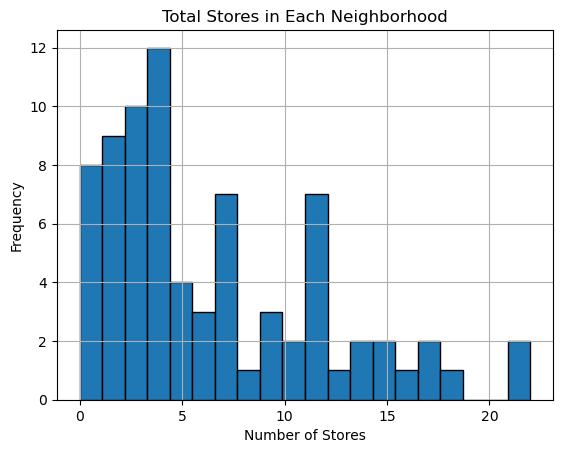

<Figure size 640x480 with 0 Axes>

In [22]:
df['Store Count'].hist(bins=20, edgecolor='black')
plt.xlabel('Number of Stores')
plt.ylabel('Frequency')
plt.title('Total Stores in Each Neighborhood')
plt.show()

#save the plot
plt.savefig('store_count_hist.png')

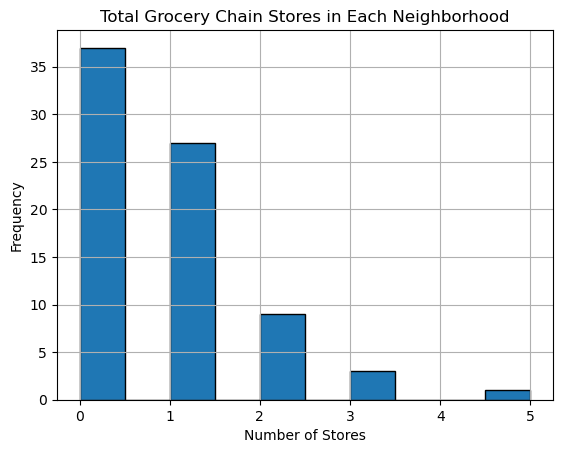

<Figure size 640x480 with 0 Axes>

In [23]:
df['Grocery Chain Count'].hist(bins=10, edgecolor='black')
plt.xlabel('Number of Stores')
plt.ylabel('Frequency')
plt.title('Total Grocery Chain Stores in Each Neighborhood')
plt.show()

#save the plot
plt.savefig('grocery_chain_count_hist.png')

In [24]:
# Renaming the columns
df = df.rename(columns={
        'HCSNVP_2022-2023': 'Perceived Violence Rate', 
        'EKW_2022': 'Walkability Index', 
        'HCSRIP_2022-2023': 'Internet Access', 
        'HCSWTSP_2022-2023': 'Transit Stop Walkable', 
        'HTJ_2018-2022': 'Crowded Housing', 
        'LFA_2019': 'Low Food Access', 
        'HCSNSP_2022-2023': 'Perceived Neighborhood Safety Rate', 
        'HCSTLEP_2022-2023': 'Trust in Law Enforcement', 
        'EDA_2018-2022': '9th Grade Grad', 
        'EDB_2018-2022': 'High School Grad', 
        'PCI_2018-2022': 'Per capita income', 
        'LEQ_2018-2022': 'Limited English Proficiency', 
        'PCT-W_2018-2022': 'Non-Hispanic White', 
        'SLA-S_2018-2022': 'Seniors Living Alone'
})

# Display the updated DataFrame
print(df.head())


             Name  GEOID  Population  Perceived Violence Rate  \
0     rogers park    1.0     55454.0                42.703467   
1    norwood park   10.0     41069.0                20.920296   
2  jefferson park   11.0     26201.0                16.374937   
3     forest glen   12.0     19579.0                 4.723026   
4      north park   13.0     17522.0                 7.810402   

   Walkability Index  Internet Access  Transit Stop Walkable  Crowded Housing  \
0          14.400510        92.294412              77.210075         6.379363   
1          14.616749        91.592146              70.949498         1.428344   
2          16.115698        91.524414              76.110605         2.450384   
3          15.378207        97.966558              80.410894         0.776295   
4          15.084818        91.603624              80.559434         5.454178   

   Low Food Access  Perceived Neighborhood Safety Rate  \
0         5.678962                           60.700016   
1     

In [25]:
columns = df.columns.tolist()
print(columns)

['Name', 'GEOID', 'Population', 'Perceived Violence Rate', 'Walkability Index', 'Internet Access', 'Transit Stop Walkable', 'Crowded Housing', 'Low Food Access', 'Perceived Neighborhood Safety Rate', 'Trust in Law Enforcement', '9th Grade Grad', 'High School Grad', 'Per capita income', 'Limited English Proficiency', 'Non-Hispanic White', 'Seniors Living Alone', 'Store Count', 'Grocery Chain Count', 'GroceryChainPresent']


In [26]:
# Categorize the dependent variable (TOTAL_STORES into Store_Category)
bins = [0, 4, 12, float('inf')]  # Define thresholds
labels = ['0-4', '5-12', '>12']               # Define categories
df['Store_Category'] = pd.cut(df['Store Count'], bins=bins, labels=labels)

# Independent variables (selecting relevant predictors)
independent_vars = [
    'Population', 'Perceived Violence Rate', 'Walkability Index', 'Internet Access', 'Transit Stop Walkable', 'Crowded Housing', 
    'Low Food Access', 'Trust in Law Enforcement', 
    'Per capita income', 'Non-Hispanic White', 'Seniors Living Alone']

# Select the variables
X = df[independent_vars]
X = sm.add_constant(X)  # Add a constant for the intercept

# Dependent variable
y = df['Store_Category']


In [27]:
X = X.apply(pd.to_numeric, errors='coerce')

In [28]:
print("NaN values in y:", y.isnull().sum()) 
print("NaN values in X:", X.isnull().sum().sum())

NaN values in y: 3
NaN values in X: 0


In [29]:
y = y.dropna()
X = X.loc[y.index].dropna()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                    Variable          VIF
0                      const  1423.708219
1                 Population     1.888524
2    Perceived Violence Rate     3.461798
3          Walkability Index     2.626497
4            Internet Access     2.387819
5      Transit Stop Walkable     3.220584
6            Crowded Housing     1.740414
7            Low Food Access     1.627849
8   Trust in Law Enforcement     3.215411
9          Per capita income     6.152561
10        Non-Hispanic White     4.989098
11      Seniors Living Alone     1.614927


In [31]:
variables_of_interest = [
    'Perceived Violence Rate', 'Walkability Index', 'Internet Access', 'Transit Stop Walkable', 'Crowded Housing', 
    'Low Food Access', 'Trust in Law Enforcement', 'Per capita income', 'Non-Hispanic White', 'Seniors Living Alone'
]
df[variables_of_interest].describe()

,Perceived Violence Rate,Walkability Index,Internet Access,Transit Stop Walkable,Crowded Housing,Low Food Access,Trust in Law Enforcement,Per capita income,Non-Hispanic White,Seniors Living Alone
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,32.984604,14.342824,89.379076,73.524551,3.357227,29.367197,53.925245,36516.298033,27.319229,36.922616
std,15.230603,1.157244,6.606818,10.220373,2.380429,27.022786,13.153884,20800.583570,25.776014,12.131240
min,3.480970,12.381935,72.424320,50.658525,0.262708,0.001517,26.301227,13127.489948,0.238510,10.966562
25%,19.597956,13.529519,85.770339,66.100420,1.536705,5.770261,44.879461,22729.777401,4.252668,27.631694
50%,34.410178,14.274597,90.784832,72.464998,2.697501,22.253462,53.621529,29734.970815,14.676412,33.579047
75%,42.703467,15.084818,94.275619,80.410894,4.581160,49.147761,60.530932,43890.639411,46.675813,44.830013
max,68.579883,17.333933,98.615401,95.712606,12.657839,99.847860,88.719634,109319.120676,83.973297,71.426714


In [32]:
model1 = OrderedModel(y, X, distr='probit', hasconst=False)
result1 = model1.fit(method='bfgs')

# Display the results
print(result1.summary())

         Current function value: 0.363380
         Iterations: 42
         Function evaluations: 94
         Gradient evaluations: 82
                             OrderedModel Results                             
Dep. Variable:         Store_Category   Log-Likelihood:                -26.890
Model:                   OrderedModel   AIC:                             81.78
Method:            Maximum Likelihood   BIC:                             114.0
Date:                Fri, 13 Dec 2024                                         
Time:                        13:58:00                                         
No. Observations:                  74                                         
Df Residuals:                      60                                         
Df Model:                          12                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

c:\Users\Duong Nguyen\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1359: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\Duong Nguyen\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1. **Model Performance:**
   - **Log-Likelihood = -26.89**: Indicates the fit of the model; a higher (less negative) value suggests a better fit.
   - **AIC (81.78) and BIC (114.0):** Measures for model comparison. Lower values are better.
   - The **model converged** after multiple iterations, but some warnings suggest issues with precision.

2. **Significant Variables:**
   - **Population** (\(p < 0.001\)): A higher population correlates positively with `Store_Category`.
   - **Low Food Access** (\(p = 0.016\)): Areas with lower food access are negatively associated with `Store_Category`.
   - **Trust in Law Enforcement** (\(p = 0.039\)): Trust in law enforcement has a negative association with `Store_Category`.
   - **Seniors Living Alone** (\(p = 0.005\)): Higher rates of seniors living alone are negatively associated.
   - **5-12/>12** (\(p < 0.001\)): Significant positive association with `Store_Category`.

3. **Insignificant Variables:**
   - Variables like **Perceived Violence Rate**, **Walkability Index**, **Internet Access**, and **Per Capita Income** are statistically insignificant (\(p > 0.05\)) in this model.


- **Population:**
  - Higher populations are positively associated with `Store_Category`, suggesting more populous neighborhoods have better or higher grocery store categories.
  
- **Low Food Access:**
  - A negative association indicates that areas with low food access are associated with lower grocery store categories.

- **Seniors Living Alone:**
  - Negatively associated, indicating these areas may have fewer high-category grocery stores.

- **Trust in Law Enforcement:**
  - Negative association could indicate that perceptions of law enforcement may indirectly relate to store categories (e.g., through safety perceptions or regional dynamics).


### Interpretation of Thresholds (`0-4/5-12` and `5-12/>12`):
Thresholds separate the categories of the dependent variable (`Store_Category`):
- **`0-4/5-12` = -6.4743:** The estimated cut-off point between `0-4` and `5-12`.
- **`5-12/>12` = 1.2953:** The estimated cut-off point between `5-12` and `>12`.

#### Explanation:
- For the latent variable \( y^* \):
  - If \( y^* \leq -6.47 \), the observation falls in the `0-4` category.
  - If \( -6.47 < y^* \leq 1.30 \), the observation falls in the `5-12` category.
  - If \( y^* > 1.30 \), the observation falls in the `>12` category.
  - The extremely low value for `0-4/5-12`** (\(-6.4743\)) might indicate issues in the model fit or data. It suggests that most observations are likely to fall in the `5-12` or `>12` categories unless predictors strongly push them down.

### 1. **What Are Thresholds?**
- Thresholds (\( \tau_1, \tau_2, \dots \)) are estimated boundaries that divide the continuous latent variable \( y^* \) into distinct, ordered categories of the dependent variable (`Store_Category`).
- \( y^* \): A latent (unobserved) variable determined by the linear combination of predictors and their coefficients.

In this case:
- \( \tau_1 \): The boundary between categories `0-4` and `5-12`.
- \( \tau_2 \): The boundary between categories `5-12` and `>12`.

---

### 2. **How Thresholds Work:**
The Ordered Probit Model predicts \( y^* \) as:
\[
y^* = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \epsilon
\]
Where:
- \( X_1, X_2, \dots \): Independent variables (e.g., population, food access).
- \( \beta_0, \beta_1, \beta_2, \dots \): Coefficients for the predictors.
- \( \epsilon \): Normally distributed error term.

The thresholds determine how the predicted \( y^* \) maps to categories of `Store_Category`:
1. \( y^* \leq \tau_1 \): Category `0-4`
2. \( \tau_1 < y^* \leq \tau_2 \): Category `5-12`
3. \( y^* > \tau_2 \): Category `>12`

---

### 3. **Impact of Thresholds on Predictions:**
1. **Probabilities for Each Category:**
   - The model calculates the probability of \( y^* \) falling between the thresholds, given the predictors.
   - Example:
     - \( P(\text{Store Category} = 0\text{-}4) = P(y^* \leq \tau_1) \)
     - \( P(\text{Store Category} = 5\text{-}12) = P(\tau_1 < y^* \leq \tau_2) \)
     - \( P(\text{Store Category} = >12) = P(y^* > \tau_2) \)

2. **Effect of Independent Variables:**
   - A higher \( y^* \) (due to positive predictors like population) increases the probability of being in higher categories (e.g., `5-12` or `>12`).
   - A lower \( y^* \) (due to negative predictors like low food access) increases the probability of being in lower categories (e.g., `0-4`).

3. **Relative Distance Between Thresholds:**
   - If \( \tau_2 - \tau_1 \) (the gap between thresholds) is small:
     - Small changes in \( y^* \) can push observations between categories, leading to more overlap.
   - If \( \tau_2 - \tau_1 \) is large:
     - Categories are more distinct, requiring larger changes in \( y^* \) to shift between categories.

---

### 4. **Interpreting Thresholds in Model:**
- **Threshold Magnitudes:**
   - The values of \( \tau_1 \) and \( \tau_2 \) indicate the difficulty of moving between categories:
     - A **high \( \tau_1 \)** means it's harder for neighborhoods to move from `0-4` to `5-12`.
     - A **low \( \tau_2 \)** means it's easier for neighborhoods to move from `5-12` to `>12`.

- **Predictor Effects Relative to Thresholds:**
   - For a predictor (e.g., population) with a large coefficient:
     - It significantly shifts \( y^* \), increasing the likelihood of crossing thresholds.
   - For a predictor with a small or zero coefficient:
     - It has little effect on the probability of being in higher categories.

---

### 5. **Practical Example:**
Suppose:
- \( \tau_1 = 0.5 \) (boundary between `0-4` and `5-12`).
- \( \tau_2 = 2.0 \) (boundary between `5-12` and `>12`).

#### Case 1: Low Food Access
- Predictor Effect: Negative.
- Neighborhoods with low food access have a lower \( y^* \), increasing the probability of falling below \( \tau_1 \) (Category `0-4`).

#### Case 2: High Population
- Predictor Effect: Positive.
- High population neighborhoods shift \( y^* \) upward, increasing the likelihood of exceeding \( \tau_2 \) (Category `>12`).

---

### 6. **Thresholds and Policy Implications:**
- **Small Thresholds (Low \( \tau_1, \tau_2 \)):**
   - Suggest that most neighborhoods can easily move to higher categories with minor changes in predictors (e.g., food access improvement).
- **Large Thresholds (High \( \tau_1, \tau_2 \)):**
   - Suggest that significant changes in predictors are needed to push neighborhoods into higher categories.

---

### Conclusion:
Thresholds directly impact how the predicted latent variable \( y^* \) maps to observed categories of `Store_Category`. They define the boundaries for moving between categories and help interpret the influence of predictors.

If you’d like help calculating the thresholds or visualizing category probabilities, let me know!

<Axes: xlabel='Store_Category'>

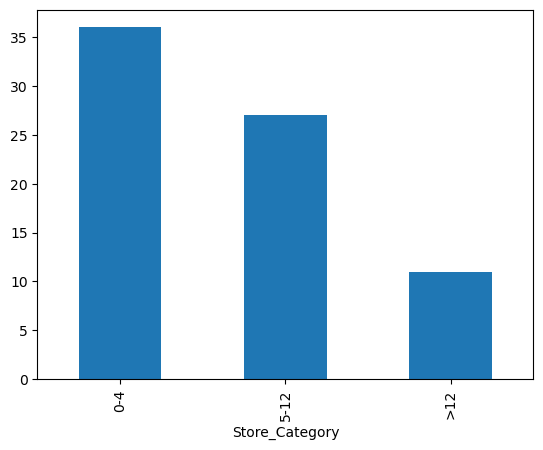

In [33]:
df['Store_Category'].value_counts().plot(kind='bar')

In [34]:
# Inspect unique values in 'Grocery Chain Count'
unique_values = df['Grocery Chain Count'].unique()
print(unique_values)

[1. 0. 2. 3. 5.]


In [35]:
# Check how the bins are being applied to the 'Grocery Chain Count'
df['Grocery Chain Count'].head(20)


0     1.0
1     1.0
2     0.0
3     0.0
4     0.0
5     1.0
6     0.0
7     1.0
8     0.0
9     0.0
10    2.0
11    2.0
12    1.0
13    1.0
14    1.0
15    1.0
16    2.0
17    2.0
18    1.0
19    0.0
Name: Grocery Chain Count, dtype: float64

The BFGS method is an iterative optimization algorithm commonly used to find the maximum or minimum of a function. The name stands for **Broyden–Fletcher–Goldfarb–Shanno**, referring to the four researchers who developed it.
1. **Type of Method**:  
   BFGS is a **quasi-Newton method**, meaning it tries to approximate second-order information (the Hessian matrix) without explicitly computing it. Traditional Newton’s method requires calculating or approximating the full Hessian matrix, which can be costly or complex for large problems.

2. **How It Works**:
   - **Start with Initial Guess**: The algorithm begins with an initial guess for the parameter values you want to optimize.
   - **Use Gradient Information**: At each iteration, BFGS uses the gradient (first derivative) of the function at the current parameter values.
   - **Build an Approximate Hessian**: Rather than computing the full Hessian directly, BFGS updates an approximation of the inverse Hessian matrix using the changes in gradients observed between successive steps.
   - **Direction and Step Size**: With the updated inverse Hessian approximation, BFGS determines the next search direction and step size to move closer to a local optimum.
   - **Iterate Until Convergence**: The process repeats until changes become very small or until it meets a predefined stopping criterion (like a maximum number of iterations).

3. **Advantages**:
   - **More Efficient than Simple Gradient Methods**: Because it uses an approximate Hessian, BFGS often converges faster and more reliably than simple gradient descent.
   - **No Need for the True Hessian**: Computing the true Hessian can be difficult or expensive. BFGS avoids that by building an approximation using gradients alone.

In [36]:
# Interaction term
# Percentage White
df['White_Percentage'] = df['Non-Hispanic White'] / df['Population']
# Log Income
df['Log_Income'] = np.log(df['Per capita income'])
# Accessibility
df['Transit Accessibility'] = df['Transit Stop Walkable'] *df['Internet Access']
# Neighborhood Density
df['Neighborhood Density'] = df['Crowded Housing'] * df['Walkability Index']

In [37]:
# Categorize the dependent variable (TOTAL_STORES into Store_Category)
df['Store_Category'] = pd.cut(
    df['Store Count'],
    bins=[0, 5, 10, 15, float('inf')],
    labels=['0–5', '6–10', '11–15', '16+']
)

# Independent variables (selecting relevant predictors)
independent_vars = [
    'Population', 'White_Percentage',
    '9th Grade Grad', 'High School Grad',
    'Perceived Violence Rate', 'Low Food Access', 
    'Transit Accessibility', 'Neighborhood Density',
    'Log_Income', 'Seniors Living Alone']

# Select the variables
X = df[independent_vars]
X = sm.add_constant(X)  # Add a constant for the intercept

# Dependent variable
y = df['Store_Category']

X = X.apply(pd.to_numeric, errors='coerce')

y = y.dropna()
X = X.loc[y.index].dropna()

model = OrderedModel(y, X, distr='probit', hasconst=False)
result = model.fit(method='bfgs')

# Display the results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.637294
         Iterations: 68
         Function evaluations: 80
         Gradient evaluations: 80
                             OrderedModel Results                             
Dep. Variable:         Store_Category   Log-Likelihood:                -47.160
Model:                   OrderedModel   AIC:                             122.3
Method:            Maximum Likelihood   BIC:                             154.6
Date:                Fri, 13 Dec 2024                                         
Time:                        13:58:01                                         
No. Observations:                  74                                         
Df Residuals:                      60                                         
Df Model:                          11                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

In [38]:
df['Chain_Store_Category'] = pd.cut(
    df['Grocery Chain Count'], 
    bins=[0, 1, 2, 3, float('inf')], 
    labels=['0', '1', '2', '3+']
)

# Independent variables (selecting relevant predictors)
independent_vars = [
    'Population', 'White_Percentage',
    'Perceived Violence Rate', 'Low Food Access', 'Neighborhood Density',
    'Per capita income', 'Seniors Living Alone']

# Select the variables
X = df[independent_vars]
X = sm.add_constant(X)  # Add a constant for the intercept

# Dependent variable
y = df['Chain_Store_Category']

X = X.apply(pd.to_numeric, errors='coerce')

y = y.dropna()
X = X.loc[y.index].dropna()

model3 = OrderedModel(y, X, distr='probit', hasconst=False)
result3 = model3.fit(method='bfgs')

# Display the results
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.677447
         Iterations: 60
         Function evaluations: 72
         Gradient evaluations: 72
                              OrderedModel Results                              
Dep. Variable:     Chain_Store_Category   Log-Likelihood:                -27.098
Model:                     OrderedModel   AIC:                             76.20
Method:              Maximum Likelihood   BIC:                             94.77
Date:                  Fri, 13 Dec 2024                                         
Time:                          13:58:01                                         
No. Observations:                    40                                         
Df Residuals:                        29                                         
Df Model:                             8                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------

In [39]:
# Count the number of stores for each unique company name
store_counts = df3['COMPANY'].value_counts().reset_index()
store_counts.columns = ['Store Name', 'Number of Stores']

# Display the result
print(store_counts)

     Store Name  Number of Stores
0    Jewel-Osco                11
1          Aldi                11
2    Dominick's                 7
3        Target                 6
4   Food 4 Less                 4
5     Sams Club                 3
6        Costco                 2
7  Trader Joe's                 1
8   Ultra Foods                 1


### Spillover Effect and Neighborhood Dynamic

In [40]:
df1.head()

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Grocery Chain
0,BOB'S LIQUORS & GROCERIES,957.0,86492.0,10001.0,A,5069 W MADISON ST,60644.0,austin,25.0,28.0,1.703125e+10,1.703130e+14,1142425.327,1899505.114,41.880296,-87.752494,"(41.8802960895, -87.7524941982)",0
1,QUICK STOP FOOD MART,39791.0,3604.0,3000.0,B,2751 W PRATT BLVD,60645.0,west ridge,2.0,50.0,1.703102e+10,1.703100e+14,1156542.527,1944958.748,42.004750,-87.699423,"(42.0047500731, -87.6994227766)",0
2,DOMINICK'S #147/1147,41674.0,5033.0,68000.0,A,1340 S CANAL ST,60607.0,near west side,28.0,2.0,1.703184e+10,1.703180e+14,1173296.123,1893985.705,41.864521,-87.639304,"(41.8645211937, -87.6393040996)",1
3,CERMAK PRODUCE,1515206.0,279468.0,25000.0,A,5220 S PULASKI RD,60632.0,west elsdon,62.0,23.0,1.703162e+10,1.703160e+14,1150549.398,1869568.674,41.797992,-87.723444,"(41.79799187, -87.7234437408)",0
4,WHOLE FOODS MARKET,54059.0,86298.0,4501.0,B,3300 N ASHLAND AVE,60657.0,lake view,6.0,44.0,1.703106e+10,1.703110e+14,1165027.797,1921997.107,41.941566,-87.668860,"(41.9415658578, -87.6688604029)",0


c:\Users\Duong Nguyen\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
c:\Users\Duong Nguyen\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


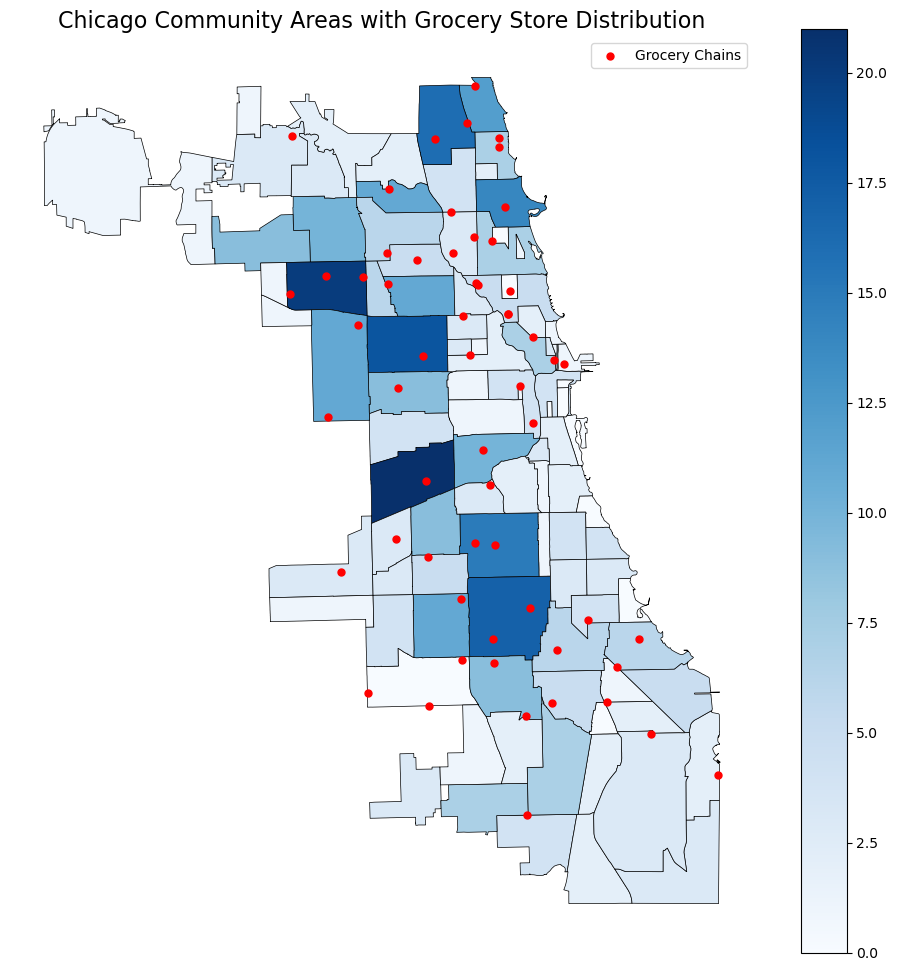

<Figure size 640x480 with 0 Axes>

In [41]:
import geopandas as gpd
from shapely import wkt

data = pd.read_csv('Neighborhoods_2012b_20241212.csv')
# Convert the CSV to a GeoDataFrame
data['geometry'] = data['the_geom'].apply(wkt.loads)
geo_data = gpd.GeoDataFrame(data, geometry='geometry')

geo_data.set_crs(epsg=4326, inplace=True)

# Ensure grocery stores have latitude and longitude
if 'LATITUDE' in df1.columns and 'LONGITUDE' in df1.columns:
    grocery_store_gdf = gpd.GeoDataFrame(
        df1,
        geometry=gpd.points_from_xy(df1['LONGITUDE'], df1['LATITUDE']),
        crs="EPSG:4326"
    )
else:
    raise ValueError("Grocery store dataset must have 'latitude' and 'longitude' columns.")

# Filter
chain_stores = grocery_store_gdf[grocery_store_gdf['Grocery Chain'] == 1]
non_chain_stores = grocery_store_gdf[grocery_store_gdf['Grocery Chain'] == 0]

# Count non-chain stores per community area
non_chain_stores = gpd.sjoin(non_chain_stores, geo_data, how='inner', op='within')  # Spatial join
non_chain_counts = non_chain_stores.groupby('PRI_NEIGH').size().reset_index(name='Non-Chain Count')

chain_stores = gpd.sjoin(chain_stores, geo_data, how='inner', op='within')  # Spatial join
chain_counts = chain_stores.groupby('PRI_NEIGH').size().reset_index(name='Chain Count')

# Merge counts with community areas
geo_data = geo_data.merge(non_chain_counts, on='PRI_NEIGH', how='left')
geo_data['Non-Chain Count'] = geo_data['Non-Chain Count'].fillna(0)  # Fill NaN with 0

geo_data = geo_data.merge(chain_counts, on='PRI_NEIGH', how='left')
geo_data['Chain Count'] = geo_data['Chain Count'].fillna(0)  # Fill NaN with 0

# Plot the map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot community areas with gradient based on non-chain store count
geo_data.plot(
    ax=ax,
    column='Non-Chain Count',
    cmap='Blues',  # Blue colormap
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# Add dots for grocery chains
chain_stores.plot(ax=ax, color='red', markersize=25, label='Grocery Chains')

# Add title and legend
ax.set_title('Chicago Community Areas with Grocery Store Distribution', fontsize=16)
ax.legend()
ax.set_axis_off()

# Show the map
plt.show()
#save the plot
plt.savefig('grocery_store_map.png')

In [42]:
# Count total grocery stores in each neighborhood
total_grocery_stores = df1.groupby('COMMUNITY AREA NAME').size().reset_index(name='Total Grocery Stores')

# Merge the total grocery stores count with geo_data
geo_data = geo_data.merge(total_grocery_stores, left_on='PRI_NEIGH', right_on='COMMUNITY AREA NAME', how='left')

# Fill NaN values with 0 (in case some neighborhoods have no grocery stores)
geo_data['Total Grocery Stores'] = geo_data['Total Grocery Stores'].fillna(0)

# Display the result
print(geo_data[['PRI_NEIGH', 'Total Grocery Stores']])

             PRI_NEIGH  Total Grocery Stores
0      Grand Boulevard                   0.0
1         Printers Row                   0.0
2        United Center                   0.0
3   Sheffield & DePaul                   0.0
4        Humboldt Park                   0.0
..                 ...                   ...
93      Belmont Cragin                   0.0
94              Austin                   0.0
95          Gold Coast                   0.0
96            Boystown                   0.0
97         River North                   0.0

[98 rows x 2 columns]


In [43]:
geo_data.head()

,the_geom,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry,Non-Chain Count,Chain Count,COMMUNITY AREA NAME,Total Grocery Stores
0,MULTIPOLYGON (((-87.60670812560372 41.81681377...,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",4.0,0.0,NaN,0.0
1,MULTIPOLYGON (((-87.62760697485348 41.87437097...,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ...",0.0,0.0,NaN,0.0
2,MULTIPOLYGON (((-87.66706868914602 41.88885187...,United Center,UNITED CENTER,3.252051e+07,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...",1.0,0.0,NaN,0.0
3,MULTIPOLYGON (((-87.65833494805533 41.92166144...,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ...",0.0,1.0,NaN,0.0
4,MULTIPOLYGON (((-87.74059567509266 41.88782316...,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ...",18.0,1.0,NaN,0.0


In [44]:
from libpysal.weights import Queen, lag_spatial

# Create a Spatial Weight Matrix
w = Queen.from_dataframe(geo_data)
w.transform = 'r'  # Row-standardized weights

geo_data['num_grocery_lag'] = lag_spatial(w, geo_data['Non-Chain Count'])

y = geo_data['num_grocery_lag']  
X = geo_data['Non-Chain Count']  
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

print(model.summary())


C:\Users\Duong Nguyen\AppData\Local\Temp\ipykernel_45772\1304231024.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(geo_data)


                            OLS Regression Results                            
Dep. Variable:        num_grocery_lag   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.46
Date:                Fri, 13 Dec 2024   Prob (F-statistic):            0.00167
Time:                        13:58:05   Log-Likelihood:                -226.86
No. Observations:                  98   AIC:                             457.7
Df Residuals:                      96   BIC:                             462.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4308      0.350     

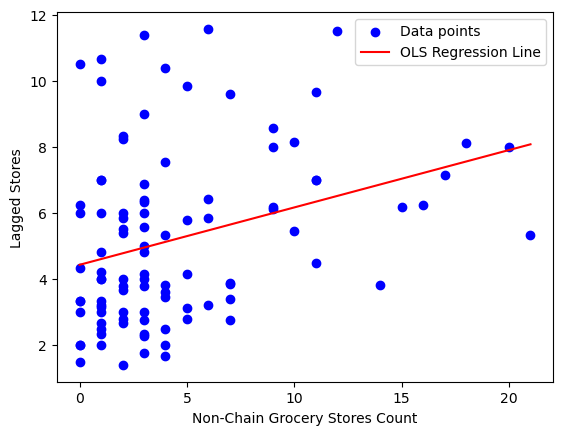

In [45]:
# Scatter plot of store distribution
plt.scatter(geo_data['Non-Chain Count'], geo_data['num_grocery_lag'], color='blue', label='Data points')

# Plot the OLS regression line
X_plot = sm.add_constant(np.linspace(geo_data['Non-Chain Count'].min(), geo_data['Non-Chain Count'].max(), 100))
y_plot = model.predict(X_plot)
plt.plot(X_plot[:, 1], y_plot, color='red', label='OLS Regression Line')

# Add labels and title
plt.xlabel('Non-Chain Grocery Stores Count')
plt.ylabel('Lagged Stores')
plt.legend()

# Show the plot
plt.show()

In [46]:
from libpysal.weights import Queen
from esda.moran import Moran


# Step 1: Create Spatial Weights Matrix (Queen Contiguity)
weights = Queen.from_dataframe(geo_data)
weights.transform = 'r'  # Row-standardized weights

# Step 2: Compute Moran's I
moran = Moran(geo_data['Non-Chain Count'], weights)

# Step 3: Output Results
print(f"Moran's I: {moran.I}")
print(f"Expected Moran's I under randomization: {moran.EI}")
print(f"P-value for Moran's I (randomization): {moran.p_sim}")


Moran's I: 0.17370023359827125
Expected Moran's I under randomization: -0.010309278350515464
P-value for Moran's I (randomization): 0.006


C:\Users\Duong Nguyen\AppData\Local\Temp\ipykernel_45772\923209732.py:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = Queen.from_dataframe(geo_data)


The lagged store variable measures the influence of nearby areas on a given area, representing a spatially weighted average of the grocery store count (or any variable) in neighboring areas. The observed clustering of grocery stores is not random. Communities with more grocery stores tend to be near others with more stores, and the same for fewer stores. The spatial structure plays a significant role in the distribution.

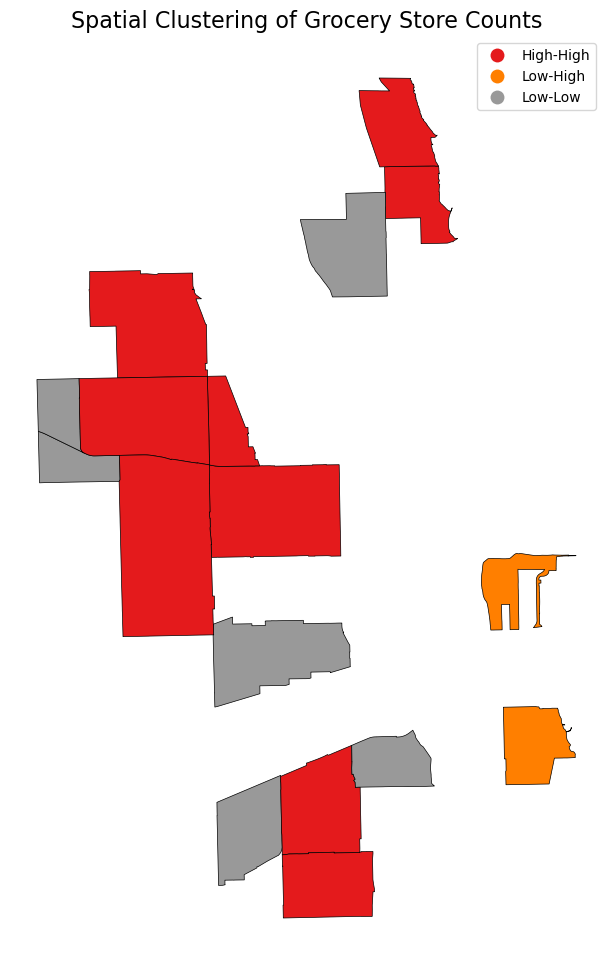

In [47]:
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

# Step 1: Compute Local Moran's I
moran_local = Moran_Local(geo_data['Non-Chain Count'], weights)

# Step 2: Add Local Moran’s I Results to the GeoDataFrame
geo_data['Moran Cluster'] = moran_local.q  # Quadrant classifications
geo_data['Significance'] = moran_local.p_sim < 0.05  # Significant clusters

# Step 3: Define Cluster Labels
cluster_labels = {
    1: "High-High",
    2: "Low-Low",
    3: "Low-High",
    4: "High-Low"
}
geo_data['Cluster Label'] = geo_data['Moran Cluster'].map(cluster_labels)

# Step 4: Plot the Map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot clusters, only for significant ones
geo_data[geo_data['Significance']].plot(
    ax=ax,
    column='Cluster Label',
    cmap='Set1',  # Color palette for clusters
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# Add a title
ax.set_title("Spatial Clustering of Grocery Store Counts", fontsize=16)

# Remove axes for a clean map
ax.set_axis_off()

# Show the map
plt.show()

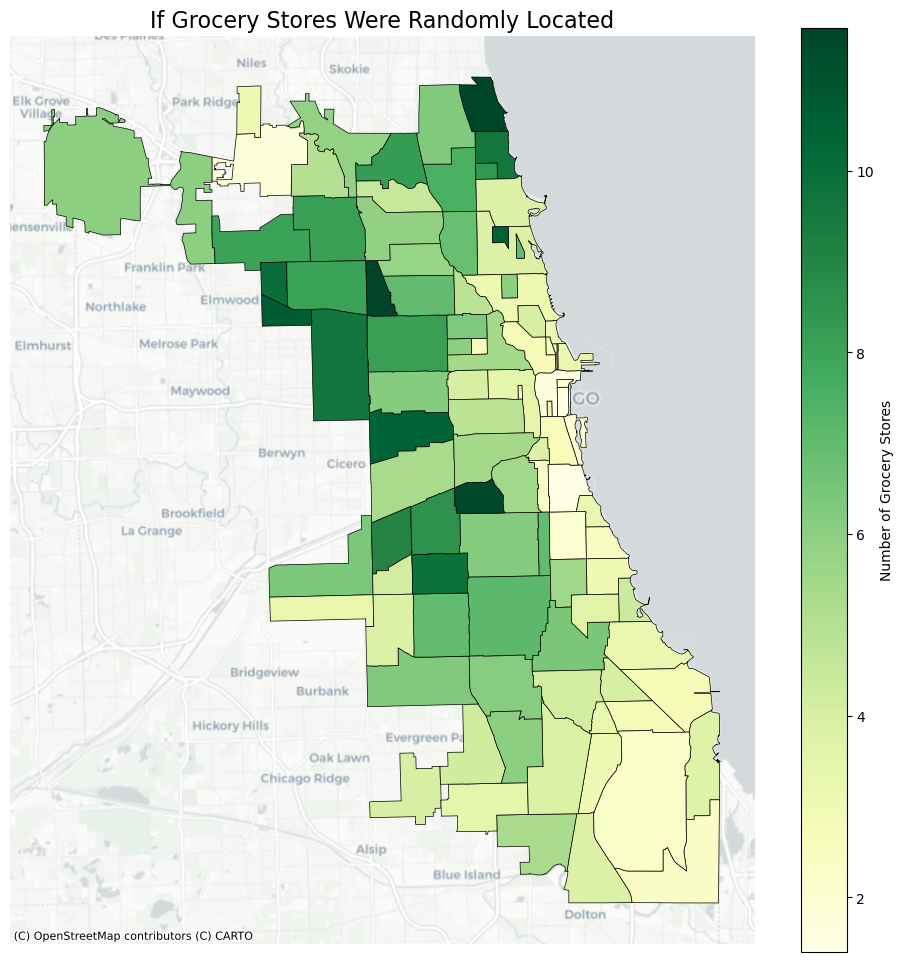

In [48]:
import contextily as ctx  

geo_data.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the community areas with the 'non-chain count' as the column
geo_data.plot(
    ax=ax,
    column='num_grocery_lag', 
    cmap='YlGn',  
    legend=True,
    legend_kwds={'label': "Number of Grocery Stores"},
    edgecolor='black',  
    linewidth=0.5
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=geo_data.crs.to_string())

ax.set_title("If Grocery Stores Were Randomly Located", fontsize=16)
ax.set_axis_off()  # Hide axes for a cleaner look

# Show the Plot
plt.show()


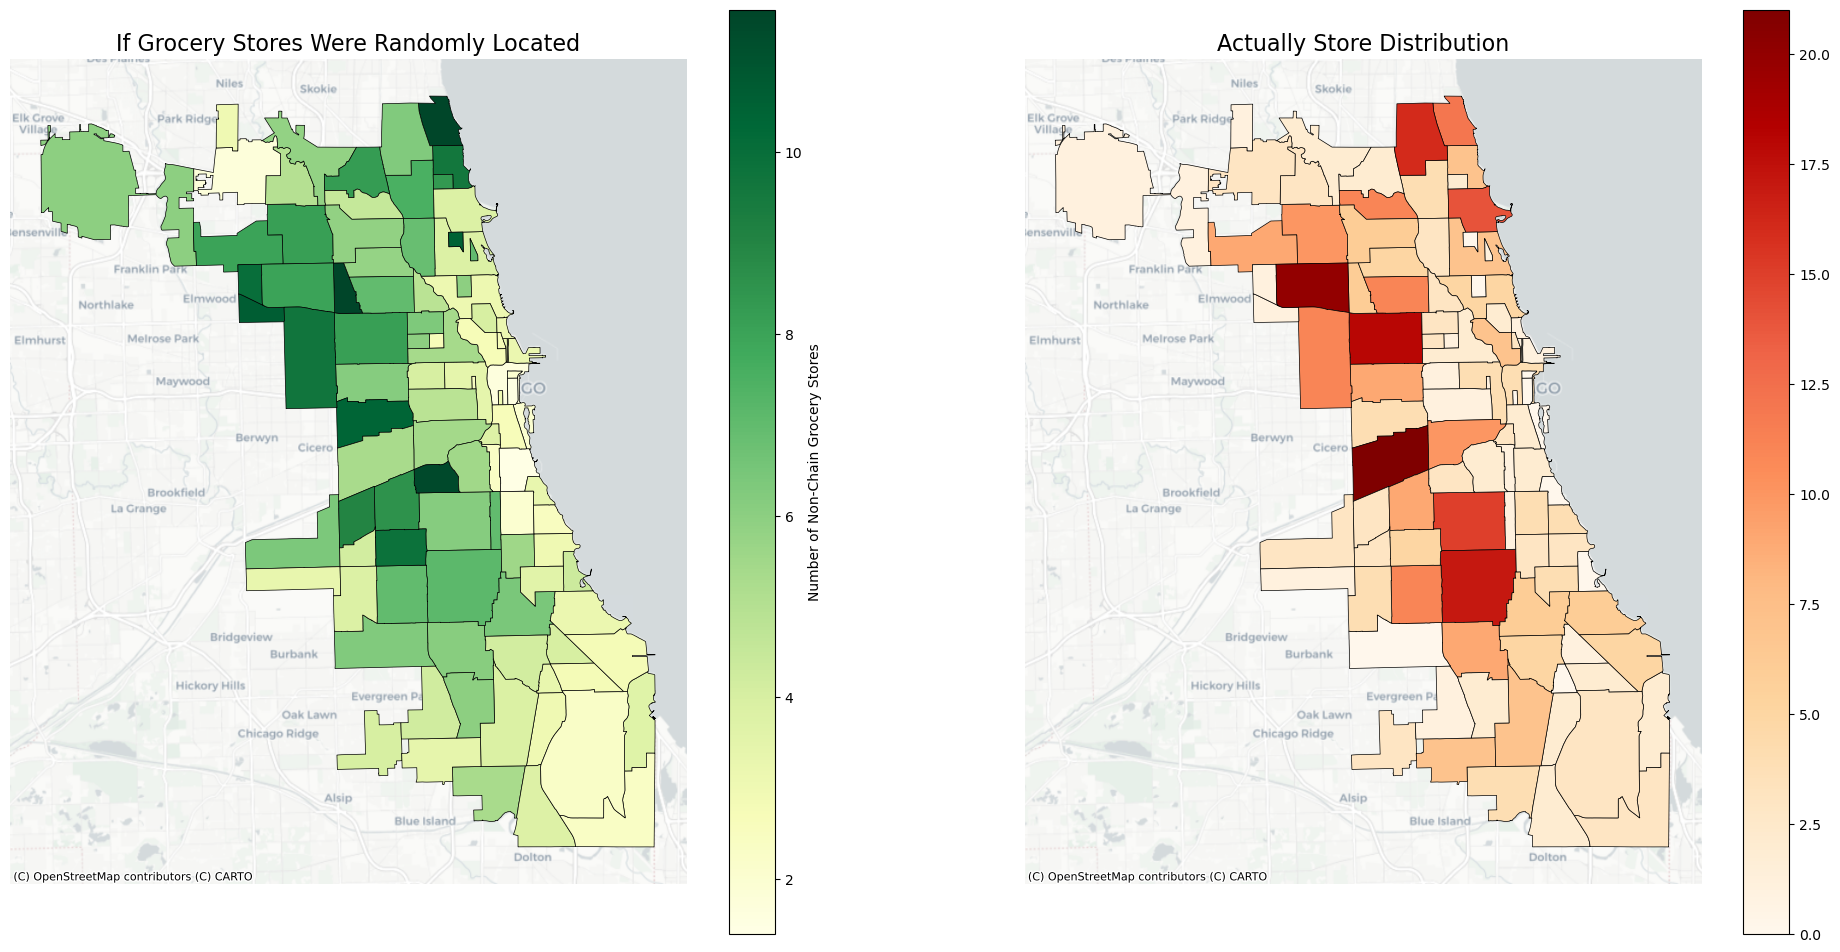

<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))

geo_data.plot(
    ax=axes[0],
    column='num_grocery_lag', 
    cmap='YlGn',  
    legend=True,
    legend_kwds={'label': "Number of Non-Chain Grocery Stores"},
    edgecolor='black',  
    linewidth=0.5
)

ctx.add_basemap(axes[0], source=ctx.providers.CartoDB.Positron, crs=geo_data.crs.to_string())

axes[0].set_title("If Grocery Stores Were Randomly Located", fontsize=16)
axes[0].set_axis_off()  # Hide axes for a cleaner look

geo_data.plot(
    ax=axes[1],
    column='Non-Chain Count', 
    cmap='OrRd',  
    legend=True,
    edgecolor='black',  
    linewidth=0.5
)

ctx.add_basemap(axes[1], source=ctx.providers.CartoDB.Positron, crs=geo_data.crs.to_string())

axes[1].set_title("Actually Store Distribution", fontsize=16)
axes[1].set_axis_off()  # Hide axes for a cleaner look

# Show the Plot
plt.show()
# Save the plot
plt.savefig('side_by_side_grocery_store_map.png')

In [50]:
# Ensure the 'Name' column in df and 'PRI_NEIGH' column in geo_data are in the same format
df['Name'] = df['Name'].str.lower()
geo_data['PRI_NEIGH'] = geo_data['PRI_NEIGH'].str.lower()

# Merge the population data from df to geo_data
geo_data = geo_data.merge(df[['Name', 'Population']], left_on='PRI_NEIGH', right_on='Name', how='left')

# Drop the redundant 'Name' column from the merged dataframe
geo_data.drop(columns=['Name'], inplace=True)

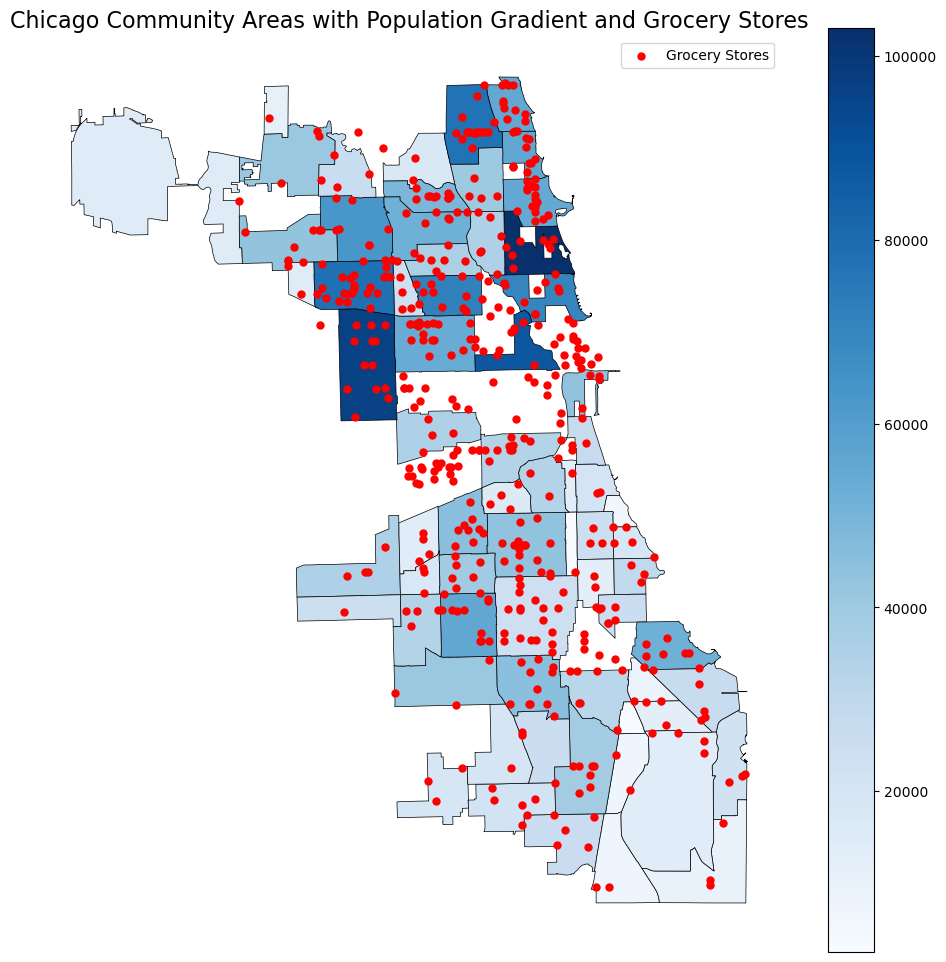

<Figure size 640x480 with 0 Axes>

In [51]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot community areas with gradient based on population
geo_data.plot(
    ax=ax,
    column='Population',
    cmap='Blues',  # Blue colormap
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# Add red dots for grocery stores
grocery_store_gdf.plot(ax=ax, color='red', markersize=25, label='Grocery Stores')

# Add title and legend
ax.set_title('Chicago Community Areas with Population Gradient and Grocery Stores', fontsize=16)
ax.legend()
ax.set_axis_off()

# Show the map
plt.show()

# Save the plot
plt.savefig('population_gradient_grocery_stores_map.png')

In [52]:
from shapely.geometry import Point
from rapidfuzz import process

# Load data
chain = pd.read_csv('Grocery Store Chains.csv')
stores = pd.read_csv('dataofchicago.csv')

# Convert LONGITUDE and LATITUDE to geometry
stores['geometry'] = stores.apply(lambda x: Point((float(x.LONGITUDE), float(x.LATITUDE))), axis=1)

# Create a list of unique chain company names
chain_names = chain['COMPANY'].unique()

# Define a function to perform fuzzy matching
def classify_store(store_name):
    result = process.extractOne(store_name, chain_names, score_cutoff=80)
    if result:
        match, score, _ = result
        return 'Chain' if match else 'Normal'
    return 'Normal'

# Apply the classification to each store
stores['Store_Type'] = stores['STORE NAME'].apply(classify_store)

# Convert to GeoDataFrame
stores_gdf = gpd.GeoDataFrame(stores, geometry='geometry')

# Check the results
print(stores_gdf[['STORE NAME', 'Store_Type']].head(15))



                   STORE NAME Store_Type
0   BOB'S LIQUORS & GROCERIES     Normal
1        QUICK STOP FOOD MART     Normal
2        DOMINICK'S #147/1147     Normal
3              CERMAK PRODUCE     Normal
4          WHOLE FOODS MARKET     Normal
5                  PATEL BROS     Normal
6              OHIO FOOD MART     Normal
7         JOE'S FOOD & LIQUOR     Normal
8          TWO BLUE FOODS INC     Normal
9      JEWEL FOOD STORE #3349     Normal
10                200 LIQUORS     Normal
11       CARNICERIA LA GLORIA     Normal
12         WHOLE FOODS MARKET     Normal
13         PETERSON FOOD MART     Normal
14                  STANLEY'S     Normal


In [53]:
stores_gdf['Store_Type'].value_counts()

Store_Type
Normal    505
Chain       5
Name: count, dtype: int64

In [54]:
# Reproject to a projected CRS suitable for distance calculations
stores_gdf = stores_gdf.set_crs(epsg=4326)
stores_gdf = stores_gdf.to_crs(epsg=32616)

# Separate chain stores
chain_stores_gdf = stores_gdf[stores_gdf['Store_Type'] == 'Chain']

# Calculate distance to the nearest chain store
stores_gdf['Nearest_Chain_Distance'] = stores_gdf['geometry'].apply(
    lambda x: chain_stores_gdf.distance(x).min() if not chain_stores_gdf.empty else None
)

# Define radius in meters
radius = 3200

# Count chain stores within the radius for each store
stores_gdf['Chain_Count_Within_Radius'] = stores_gdf['geometry'].apply(
    lambda x: chain_stores_gdf[chain_stores_gdf.distance(x) <= radius].shape[0] if not chain_stores_gdf.empty else 0
)

# View updated DataFrame
print(stores_gdf[['STORE NAME', 'Store_Type', 'Nearest_Chain_Distance', 'Chain_Count_Within_Radius']].head(15))


                   STORE NAME Store_Type  Nearest_Chain_Distance  \
0   BOB'S LIQUORS & GROCERIES     Normal             4701.503069   
1        QUICK STOP FOOD MART     Normal            14157.687413   
2        DOMINICK'S #147/1147     Normal             3398.329779   
3              CERMAK PRODUCE     Normal             4218.982445   
4          WHOLE FOODS MARKET     Normal             6840.182021   
5                  PATEL BROS     Normal            13308.639285   
6              OHIO FOOD MART     Normal             6036.511796   
7         JOE'S FOOD & LIQUOR     Normal            11830.757072   
8          TWO BLUE FOODS INC     Normal             7686.051670   
9      JEWEL FOOD STORE #3349     Normal            10503.388767   
10                200 LIQUORS     Normal             4499.318824   
11       CARNICERIA LA GLORIA     Normal             1486.788387   
12         WHOLE FOODS MARKET     Normal             2967.234309   
13         PETERSON FOOD MART     Normal        

In [55]:
stores_gdf['Nearest_Chain_Distance'] = pd.to_numeric(stores_gdf['Nearest_Chain_Distance'], errors='coerce')

In [56]:
print(stores_gdf['Nearest_Chain_Distance'].describe())


count      506.000000
mean      6559.920344
std       4107.307455
min          0.000000
25%       3209.319678
50%       6310.452815
75%       9480.959055
max      19491.342955
Name: Nearest_Chain_Distance, dtype: float64


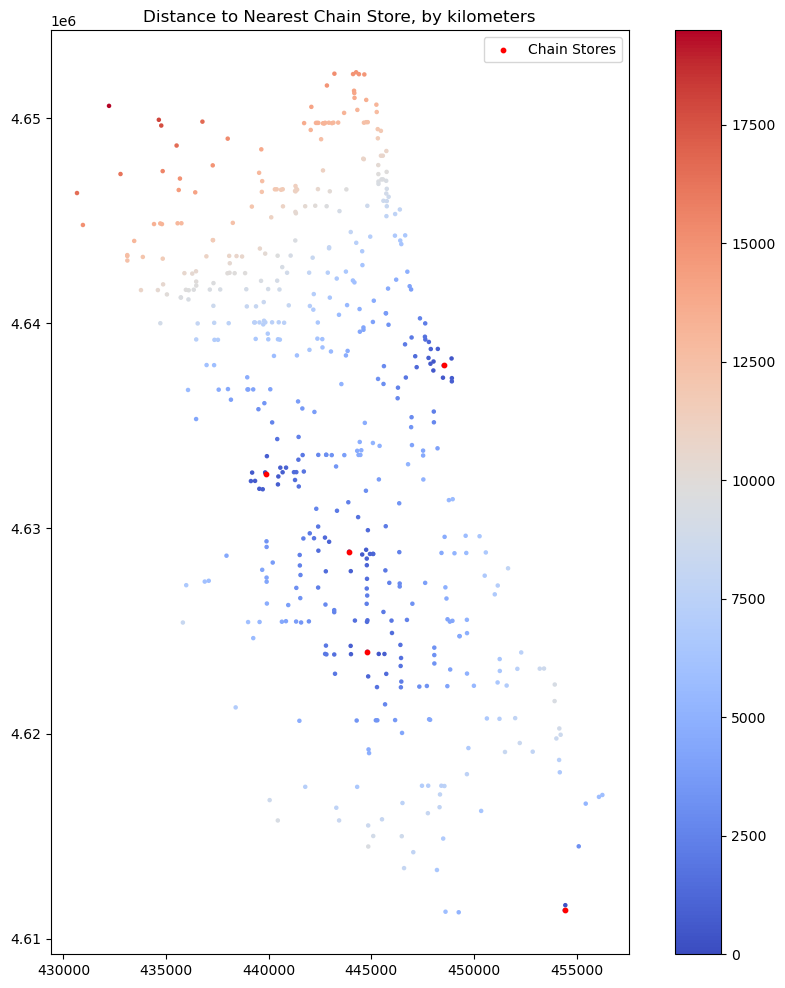

In [65]:
#Plot stores with marker size proportional to the distance to the nearest chain store
fig, ax = plt.subplots(figsize=(12, 12))
stores_gdf.plot(ax=ax, column='Nearest_Chain_Distance', cmap='coolwarm', legend=True, markersize=5)
chain_stores_gdf.plot(ax=ax, color='red', label='Chain Stores', markersize=10)
plt.legend()
plt.title("Distance to Nearest Chain Store, by kilometers")
plt.show()


In [58]:
# Aggregate stores_gdf by community area
store_agg = stores_gdf.groupby('COMMUNITY AREA').agg(
    Avg_Nearest_Chain_Distance=('Nearest_Chain_Distance', 'mean'),
    Median_Nearest_Chain_Distance=('Nearest_Chain_Distance', 'median'),
    Store_Count=('COMMUNITY AREA', 'count')
).reset_index()


In [59]:
df

,Name,GEOID,Population,Perceived Violence Rate,Walkability Index,Internet Access,Transit Stop Walkable,Crowded Housing,Low Food Access,Perceived Neighborhood Safety Rate,...,Seniors Living Alone,Store Count,Grocery Chain Count,GroceryChainPresent,Store_Category,White_Percentage,Log_Income,Transit Accessibility,Neighborhood Density,Chain_Store_Category
0,rogers park,1.0,55454.0,42.703467,14.400510,92.294412,77.210075,6.379363,5.678962,60.700016,...,44.830013,13.0,1.0,1,11–15,0.000831,10.416858,7126.058531,91.866080,0
1,norwood park,10.0,41069.0,20.920296,14.616749,91.592146,70.949498,1.428344,57.982295,77.766413,...,29.292268,4.0,1.0,1,0–5,0.001728,10.738134,6498.416793,20.877742,0
2,jefferson park,11.0,26201.0,16.374937,16.115698,91.524414,76.110605,2.450384,9.388207,79.263826,...,33.579047,3.0,0.0,0,0–5,0.002176,10.558812,6965.978498,39.489650,NaN
3,forest glen,12.0,19579.0,4.723026,15.378207,97.966558,80.410894,0.776295,17.519885,94.582335,...,27.274631,2.0,0.0,0,0–5,0.003775,11.080942,7877.578525,11.938022,NaN
4,north park,13.0,17522.0,7.810402,15.084818,91.603624,80.559434,5.454178,76.778115,87.166696,...,29.223526,2.0,0.0,0,0–5,0.002591,10.439228,7379.536068,82.275285,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,morgan park,75.0,21714.0,25.231252,14.098944,94.928749,67.765166,1.145780,32.350856,76.539645,...,32.494054,7.0,0.0,0,6–10,0.001412,10.491518,6432.862474,16.154288,NaN
73,o'hare,76.0,14416.0,3.480970,12.989308,86.057960,71.987712,4.032130,75.771284,85.645703,...,31.327907,0.0,0.0,0,NaN,0.004238,10.521558,6195.115634,52.374581,NaN
74,edgewater,77.0,56308.0,16.351904,13.866368,97.841598,90.686080,3.225074,0.001517,81.420828,...,49.187219,11.0,2.0,1,11–15,0.000953,10.768423,8872.870999,44.720068,1
75,near north side,8.0,97789.0,35.607554,16.047329,98.615401,91.139943,2.108849,0.003473,74.399614,...,44.628028,17.0,3.0,1,16+,0.000702,11.602027,8987.802085,33.841401,2


In [60]:
store_agg

,COMMUNITY AREA,Avg_Nearest_Chain_Distance,Median_Nearest_Chain_Distance,Store_Count
0,1.0,13729.153982,13747.858685,13
1,2.0,13410.350772,13185.235969,18
2,3.0,8835.999477,8835.174610,15
3,4.0,10420.674289,10349.076106,4
4,5.0,8209.578084,8006.627281,6
...,...,...,...,...
70,73.0,4848.276109,4848.276109,2
71,74.0,8402.317095,8655.656455,3
72,75.0,8396.165665,8332.883458,7
73,76.0,16490.150103,16490.150103,1


In [61]:

# Merge aggregated store data with df
combined_df = pd.merge(df, store_agg, left_on='GEOID' , right_on='COMMUNITY AREA', how='left')

# Drop rows with missing data (if needed)
combined_df = combined_df.dropna()


In [62]:

# Define independent variables (socioeconomic characteristics)
X = combined_df[['Population', 'Perceived Violence Rate', 'Walkability Index', 
                 'Internet Access', 'Transit Stop Walkable', 'Low Food Access', 
                 'Crowded Housing', 'Per capita income']]
X = sm.add_constant(X)  # Add a constant for the intercept

# Define dependent variable (average distance to the nearest chain store)
y = combined_df['Avg_Nearest_Chain_Distance']

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Display the results
print(results.summary())


                                OLS Regression Results                                
Dep. Variable:     Avg_Nearest_Chain_Distance   R-squared:                       0.314
Model:                                    OLS   Adj. R-squared:                  0.137
Method:                         Least Squares   F-statistic:                     1.774
Date:                        Fri, 13 Dec 2024   Prob (F-statistic):              0.121
Time:                                13:58:28   Log-Likelihood:                -378.39
No. Observations:                          40   AIC:                             774.8
Df Residuals:                              31   BIC:                             790.0
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

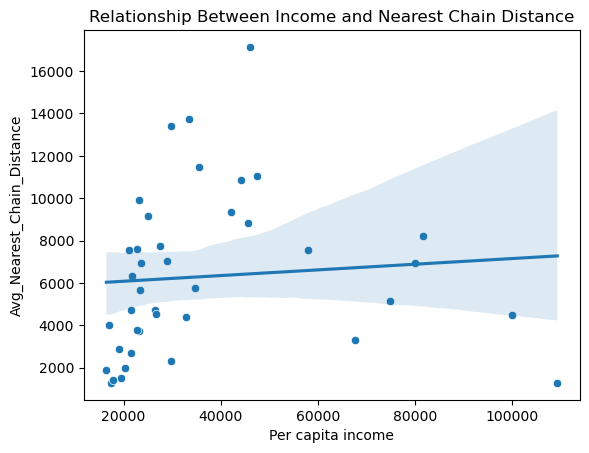

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Per capita income', y='Avg_Nearest_Chain_Distance', data=combined_df)
plt.title("Relationship Between Income and Nearest Chain Distance")
plt.xlabel("Per Capita Income")
plt.ylabel("Avg Nearest Chain Distance")
#adding trendline
sns.regplot(x='Per capita income', y='Avg_Nearest_Chain_Distance', data=combined_df, scatter=False)
plt.show()
